<a href="https://colab.research.google.com/github/RA2112702010007AD/ReportWritingProjectImplementation/blob/main/ReportWritingFinalImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Text Data Collection**

In [ ]:
reddit_data = pd.read_csv('/content/Reddit_Data.csv')
twitter_data = pd.read_csv('/content/Twitter_Data.csv')

# **Cleaning The Dataset**

In [ ]:
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())

    for i in punc:
        cleanedText = cleanedText.replace(i, '')

    a = [i for i in cleanedText if i.isalpha() or i == ' ']

    final_text = ' '.join(''.join(a).split())
    return final_text

In [ ]:
reddit_data = reddit_data.dropna(how='any')
twitter_data = twitter_data.dropna(how='any')

In [ ]:
reddit_data.rename(columns={'clean_comment':'comment'}, inplace=True)
twitter_data.rename(columns={'clean_text':'comment'}, inplace=True)

In [ ]:
reddit_data.category = reddit_data.category.apply(lambda x: int(x))
twitter_data.category = twitter_data.category.apply(lambda x: int(x))

In [ ]:
reddit_data.comment = reddit_data.comment.apply(cleanText)
twitter_data.comment = twitter_data.comment.apply(cleanText)

In [ ]:
reddit_data.drop_duplicates(subset='comment', keep=False, inplace=True)
twitter_data.drop_duplicates(subset='comment', keep=False, inplace=True)

# **Text Data Aqcuisition**

In [ ]:
reddit_data.head()

,comment,category
0,family mormon have never tried explain them th...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
reddit_data.describe()

,category
count,36264.000000
mean,0.205465
std,0.784858
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
twitter_data.head()

,comment,category
0,when modi promised minimum government maximum ...,-1
1,talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp to...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [ ]:
twitter_data.describe()

,category
count,156798.000000
mean,0.226597
std,0.783808
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# **Concatination**

In [ ]:
concat_df = pd.concat([reddit_data, twitter_data], ignore_index=True)
concat_df.drop_duplicates(subset='comment', keep=False, inplace=True)

# **Data Visualisation**

In [ ]:
counts = [len(reddit_data), len(twitter_data), len(concat_df)]
labels = ['Reddit', 'Twitter', 'Total']
colors = ['#ff4500', '#1DA1F2', '#50C878']

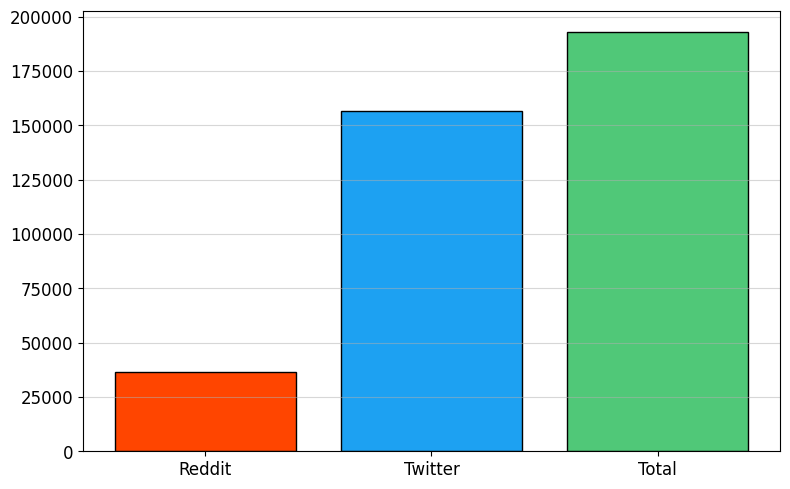

In [ ]:
plt.figure(figsize=(8,5))

plt.bar(labels, counts, color=colors, edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

# **Counting Comments**

In [ ]:
negative_count = [len(reddit_data[reddit_data.category == -1]),
                 len(twitter_data[twitter_data.category == -1]),
                 len(concat_df[concat_df.category == -1])]

neutral_count = [len(reddit_data[reddit_data.category == 0]),
                 len(twitter_data[twitter_data.category == 0]),
                 len(concat_df[concat_df.category == 0])]

positive_count = [len(reddit_data[reddit_data.category == 1]),
                 len(twitter_data[twitter_data.category == 1]),
                 len(concat_df[concat_df.category == 1])]

x = ['Reddit', 'Twitter', 'Total']
x_indexes = np.arange(len(x))
width = 0.25

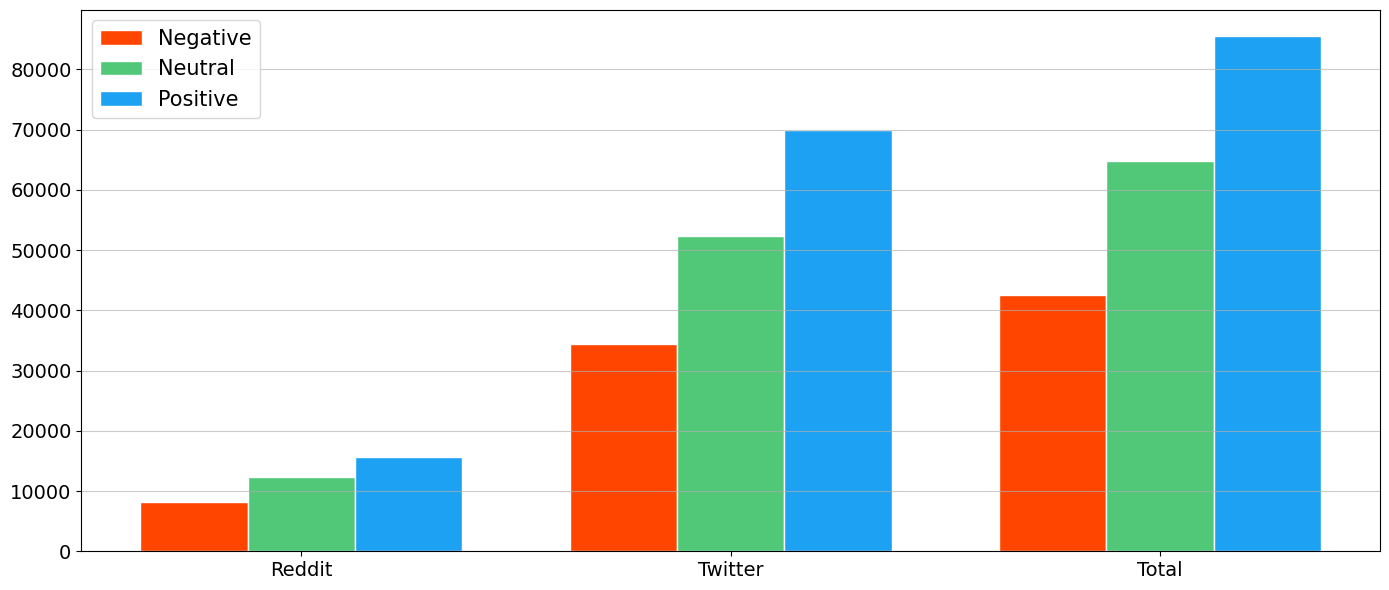

In [ ]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='#ff4500')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='#50C878')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='#1DA1F2')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

In [ ]:
negative_avg = int(sum([len(i) for i in concat_df[concat_df.category == -1].comment]) / len(concat_df[concat_df.category == 1]))
neutral_avg = int(sum([len(i) for i in concat_df[concat_df.category == 0].comment]) / len(concat_df[concat_df.category == 0]))
positive_avg = int(sum([len(i) for i in concat_df[concat_df.category == 1].comment]) / len(concat_df[concat_df.category == 1]))

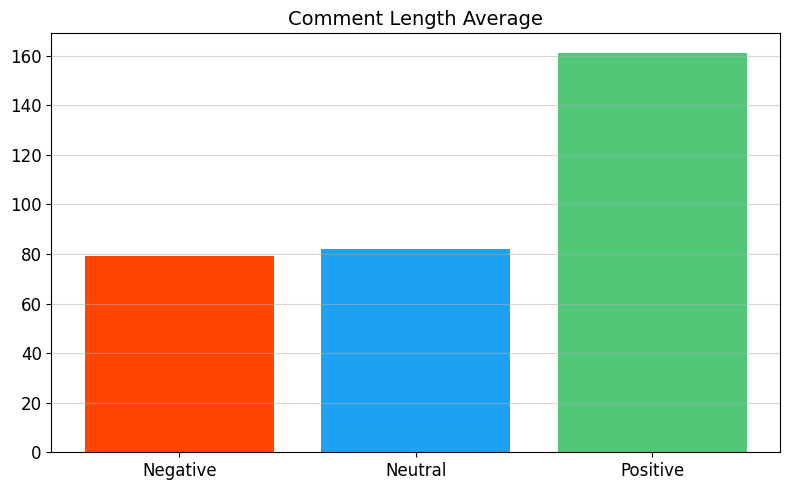

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(['Negative', 'Neutral', 'Positive'], [negative_avg, neutral_avg, positive_avg], color=colors)
plt.title('Comment Length Average', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

In [ ]:
class Data:
    def __init__(self, df):
        self.df = df

    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])

        # final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category == 0][:lowest_len],
                             dataframe[dataframe.category == 1][:lowest_len]])

        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac=1).reset_index(drop=True)
        return final_df


In [ ]:
a = Data(concat_df)
fixed_df = a.fixData()
print(f'Before: \n{concat_df.category.value_counts()}\n')
print(f'After: \n{fixed_df.category.value_counts()}')

Before: 
category
 1    85581
 0    64771
-1    42628
Name: count, dtype: int64

After: 
category
-1    42628
 1    42628
 0    42628
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.comment], [i for i in fixed_df.category], test_size=0.25, random_state=1)


In [ ]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

# **Algorithms Comparitive Analysis**

**1. SVM**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, precision_score, recall_score

# Train the SVM classifier
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)

# Make predictions
clf_prediction = clf_svm.predict(test_X_vectors)

# Calculate metrics
accuracy = clf_svm.score(test_X_vectors, test_y)
f1 = f1_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])
precision = precision_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])
recall = recall_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])

# Print results
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.934941040317788
F1 Score: [0.92051563 0.96150477 0.92208404]
Precision: [0.92797545 0.94490758 0.93138561]
Recall: [0.91317478 0.97869545 0.91296642]


**2. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize and fit the Decision Tree Classifier
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)

# Predict on the test set
dtc_prediction = svm_dtc.predict(test_X_vectors)

# Calculate accuracy, F1 score, precision, and recall
accuracy = svm_dtc.score(test_X_vectors, test_y)
f1 = f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])
precision = precision_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])
recall = recall_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Accuracy: 0.7799255575365175
F1 Score: [0.7307711  0.8493299  0.75509434]
Precision: [0.75312969 0.81792108 0.76374046]
Recall: [0.70970177 0.8832473  0.74664179]


**3. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, precision_score, recall_score

# Initialize the MultinomialNB classifier
nb = MultinomialNB()

# Fit the model on the training data
nb.fit(train_X_vectors, train_y)

# Make predictions on the test data
nb_prediction = nb.predict(test_X_vectors)

# Calculate and print the accuracy
accuracy = nb.score(test_X_vectors, test_y)
print(f'Accuracy: {accuracy}')

# Calculate and print the F1 Score
f1 = f1_score(test_y, nb_prediction, average=None, labels=[-1, 0, 1])
print(f'F1 Score: {f1}')

# Calculate and print Precision
precision = precision_score(test_y, nb_prediction, average=None, labels=[-1, 0, 1])
print(f'Precision: {precision}')

# Calculate and print Recall
recall = recall_score(test_y, nb_prediction, average=None, labels=[-1, 0, 1])
print(f'Recall: {recall}')


Accuracy: 0.7011979606518407
F1 Score: [0.72481483 0.61051844 0.73868827]
Precision: [0.63454043 0.91049498 0.68644882]
Recall: [0.84503586 0.45922102 0.79953358]


# **Evaluation Metrics Comparison**

In [ ]:
import pandas as pd

# Data for each model
data = {
    "Algorithmic Model": ["SVM", "Decision Tree", "Naive Bayes"],
    "Accuracy": [0.934941040317788, 0.7799255575365175, 0.7011979606518407],
    "F1 Score": [
        [0.92051563, 0.96150477, 0.92208404],
        [0.7307711, 0.8493299, 0.75509434],
        [0.72481483, 0.61051844, 0.73868827]
    ],
    "Precision": [
        [0.92797545, 0.94490758, 0.93138561],
        [0.75312969, 0.81792108, 0.76374046],
        [0.63454043, 0.91049498, 0.68644882]
    ],
    "Recall": [
        [0.91317478, 0.97869545, 0.91296642],
        [0.70970177, 0.8832473, 0.74664179],
        [0.84503586, 0.45922102, 0.79953358]
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
print(df.to_string(index=False))


Algorithmic Model  Accuracy                             F1 Score                            Precision                               Recall
              SVM  0.934941 [0.92051563, 0.96150477, 0.92208404] [0.92797545, 0.94490758, 0.93138561] [0.91317478, 0.97869545, 0.91296642]
    Decision Tree  0.779926   [0.7307711, 0.8493299, 0.75509434] [0.75312969, 0.81792108, 0.76374046]  [0.70970177, 0.8832473, 0.74664179]
      Naive Bayes  0.701198 [0.72481483, 0.61051844, 0.73868827] [0.63454043, 0.91049498, 0.68644882] [0.84503586, 0.45922102, 0.79953358]


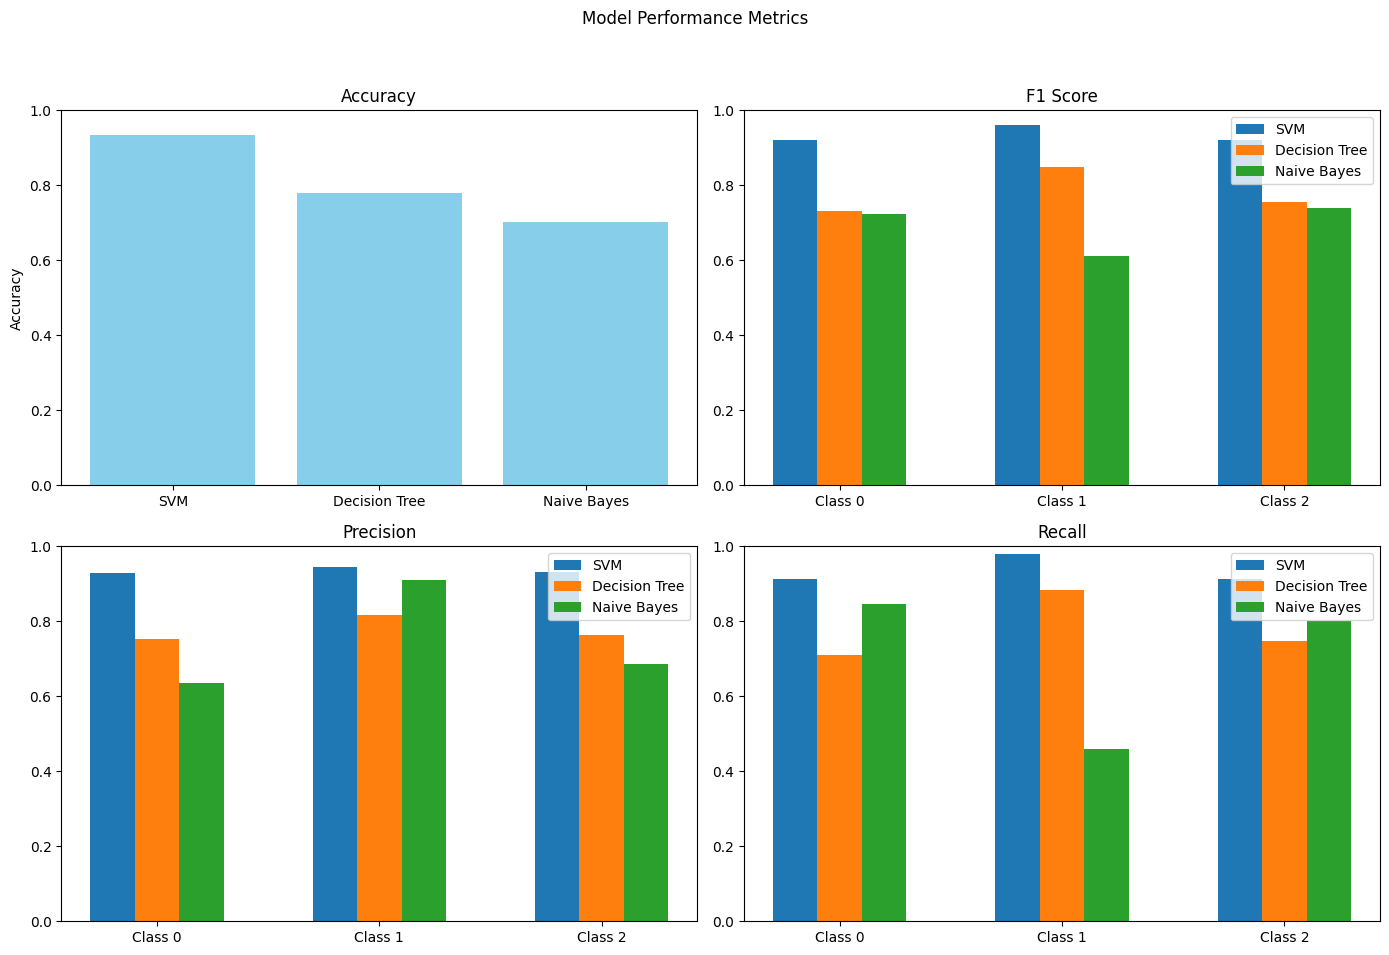

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data for each model
models = ["SVM", "Decision Tree", "Naive Bayes"]
accuracy = [0.934941040317788, 0.7799255575365175, 0.7011979606518407]
f1_scores = [
    [0.92051563, 0.96150477, 0.92208404],
    [0.7307711, 0.8493299, 0.75509434],
    [0.72481483, 0.61051844, 0.73868827]
]
precision = [
    [0.92797545, 0.94490758, 0.93138561],
    [0.75312969, 0.81792108, 0.76374046],
    [0.63454043, 0.91049498, 0.68644882]
]
recall = [
    [0.91317478, 0.97869545, 0.91296642],
    [0.70970177, 0.8832473, 0.74664179],
    [0.84503586, 0.45922102, 0.79953358]
]

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Model Performance Metrics')

# Plot Accuracy
axs[0, 0].bar(models, accuracy, color='skyblue')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 1)
axs[0, 0].set_ylabel('Accuracy')

# Plot F1 Scores
for i, model in enumerate(models):
    axs[0, 1].bar(np.arange(3) + i*0.2, f1_scores[i], width=0.2, label=model)
axs[0, 1].set_title('F1 Score')
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_xticks(np.arange(3) + 0.2)
axs[0, 1].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axs[0, 1].legend()

# Plot Precision
for i, model in enumerate(models):
    axs[1, 0].bar(np.arange(3) + i*0.2, precision[i], width=0.2, label=model)
axs[1, 0].set_title('Precision')
axs[1, 0].set_ylim(0, 1)
axs[1, 0].set_xticks(np.arange(3) + 0.2)
axs[1, 0].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axs[1, 0].legend()

# Plot Recall
for i, model in enumerate(models):
    axs[1, 1].bar(np.arange(3) + i*0.2, recall[i], width=0.2, label=model)
axs[1, 1].set_title('Recall')
axs[1, 1].set_ylim(0, 1)
axs[1, 1].set_xticks(np.arange(3) + 0.2)
axs[1, 1].set_xticklabels(['Class 0', 'Class 1', 'Class 2'])
axs[1, 1].legend()

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
